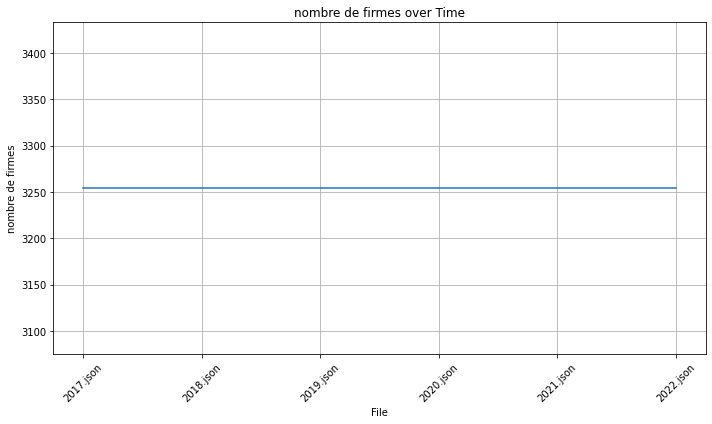

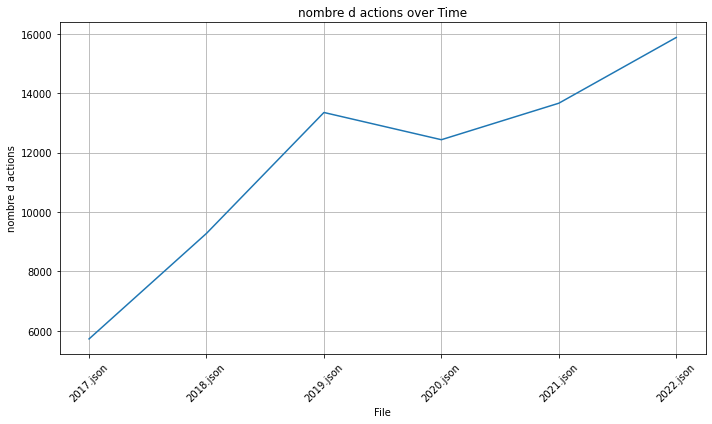

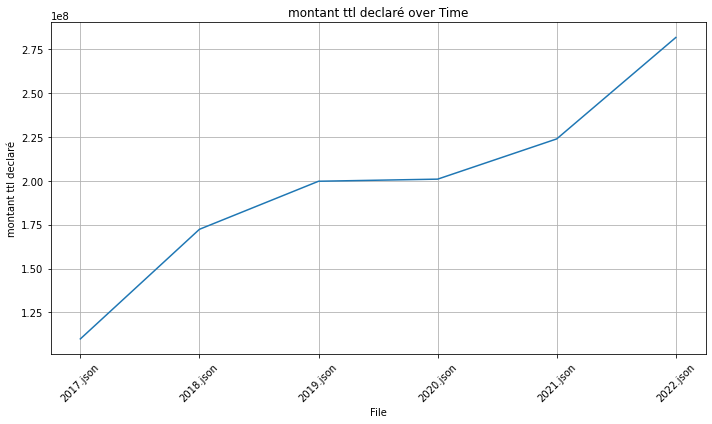

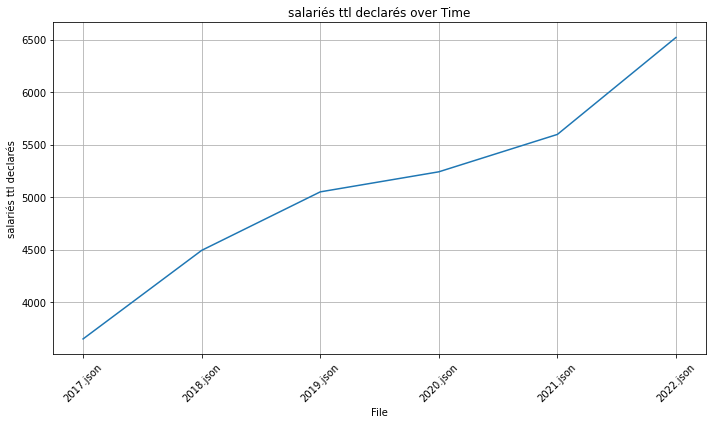

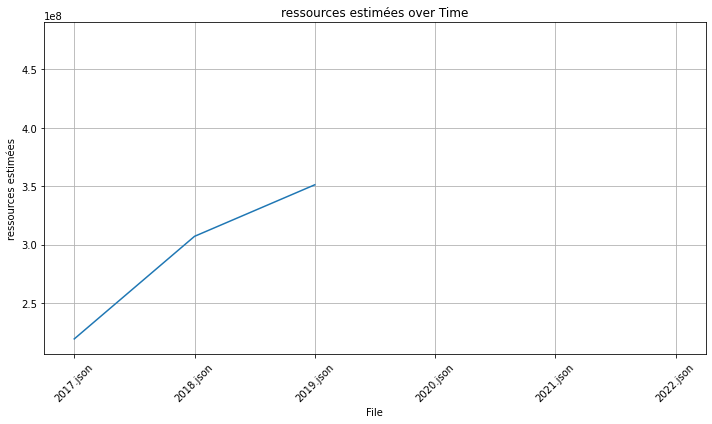

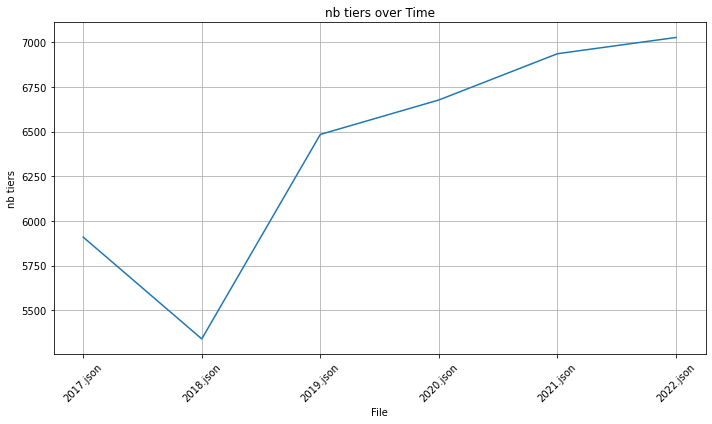

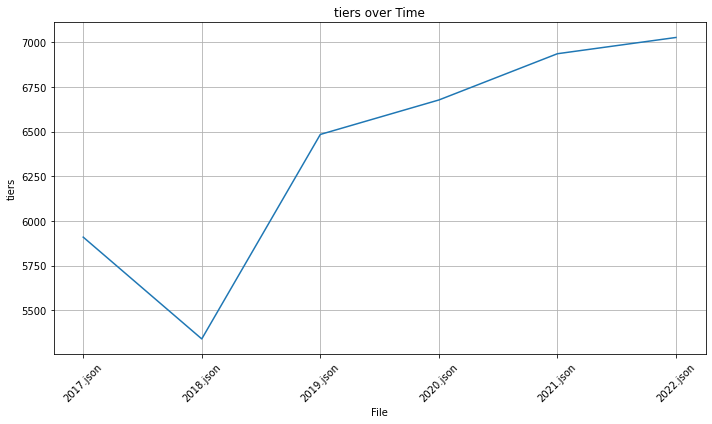

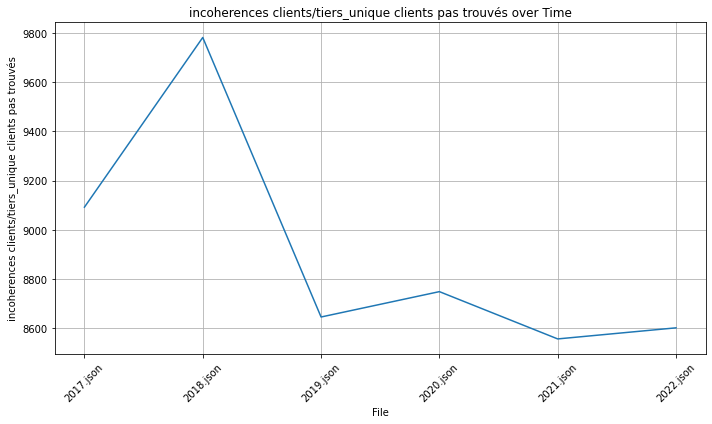

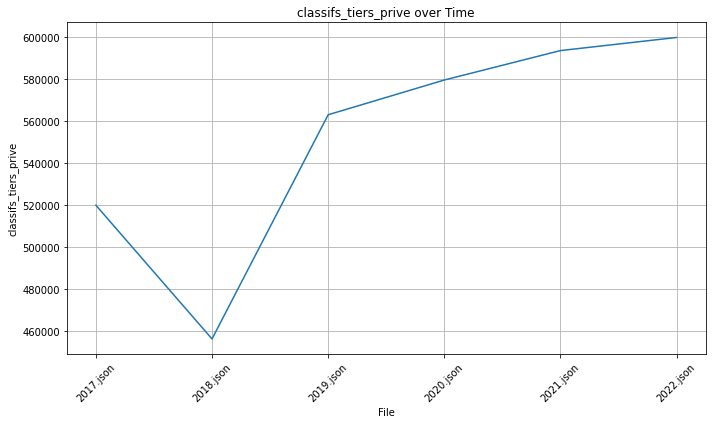

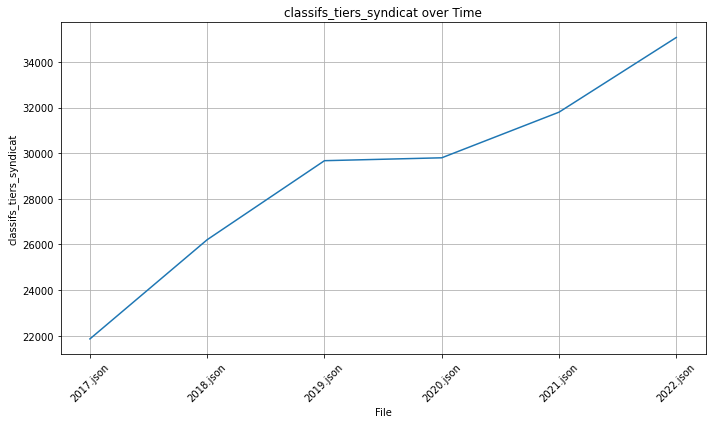

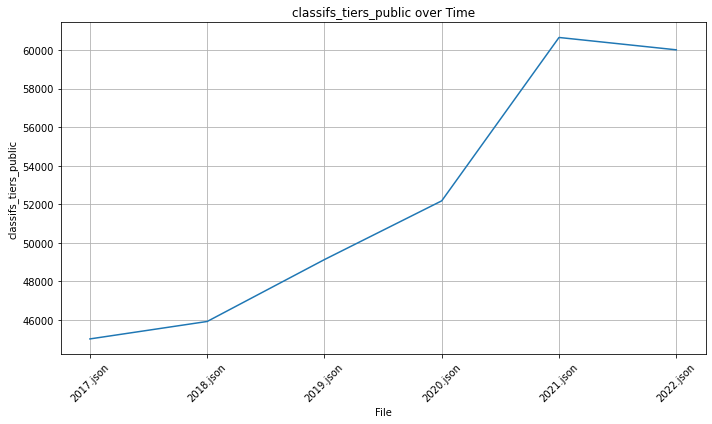

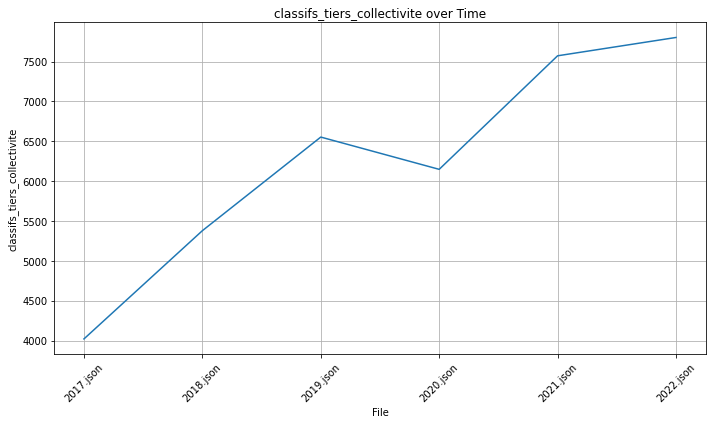

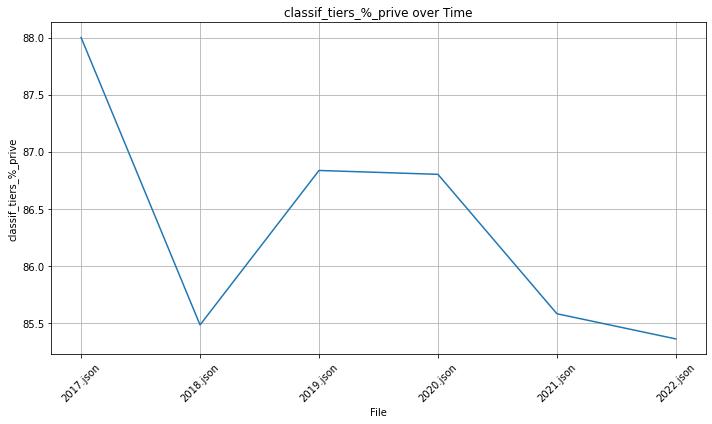

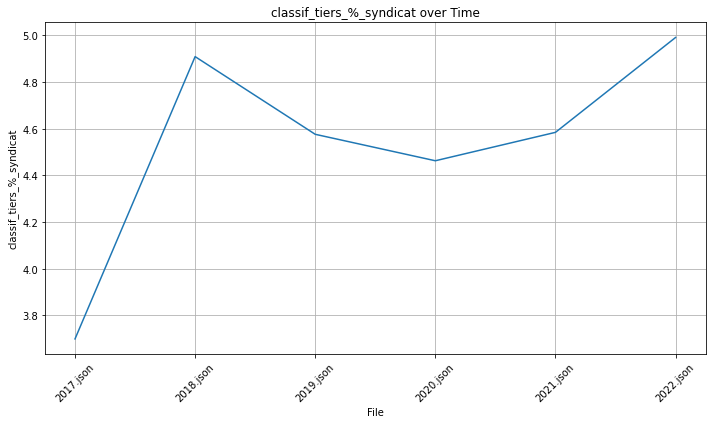

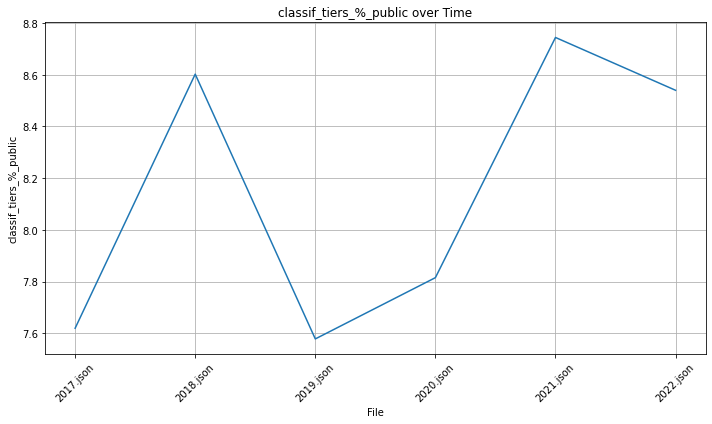

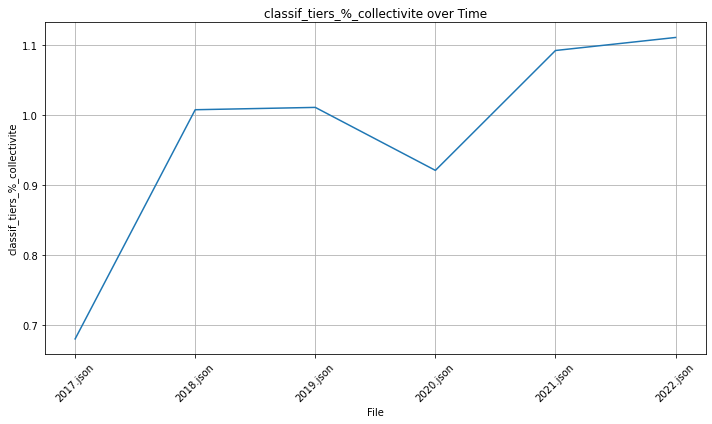

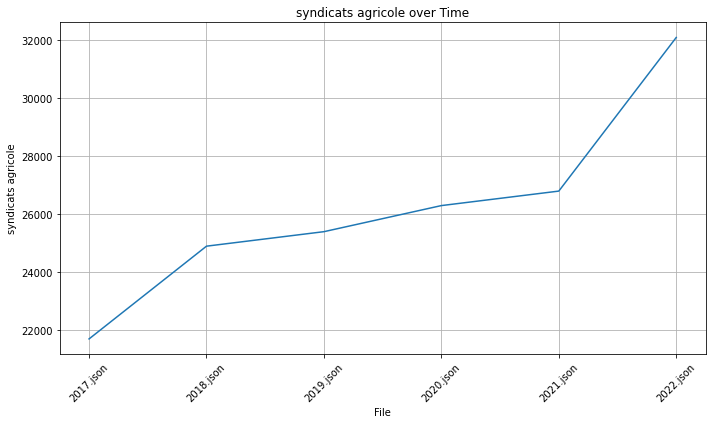

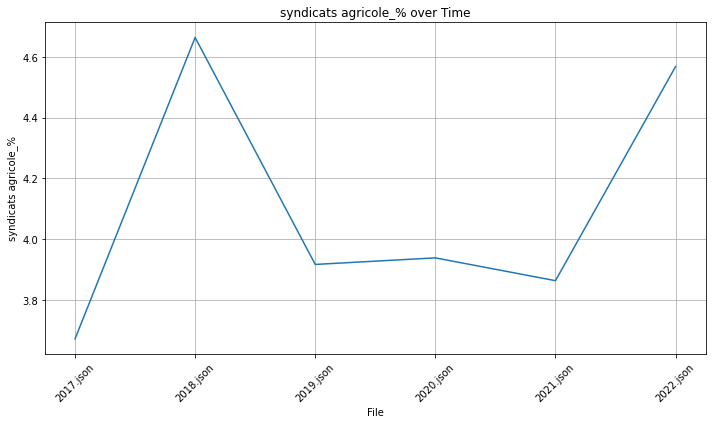

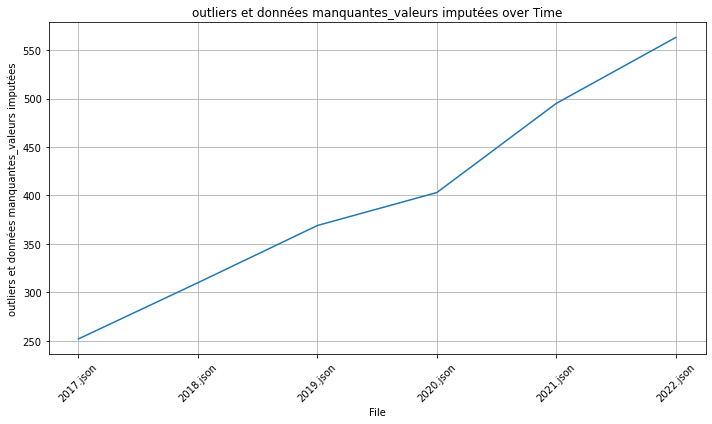

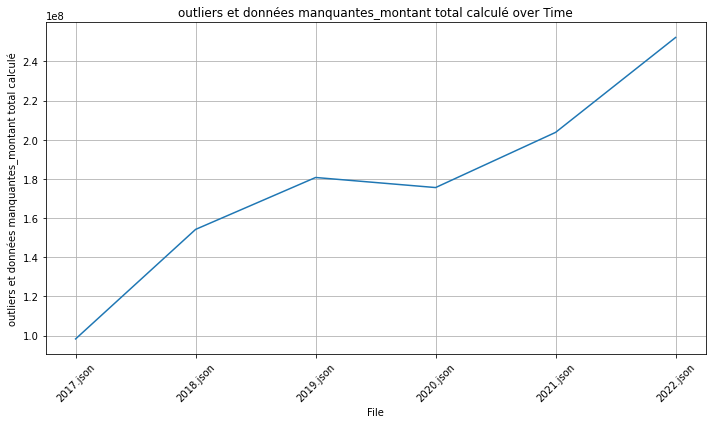

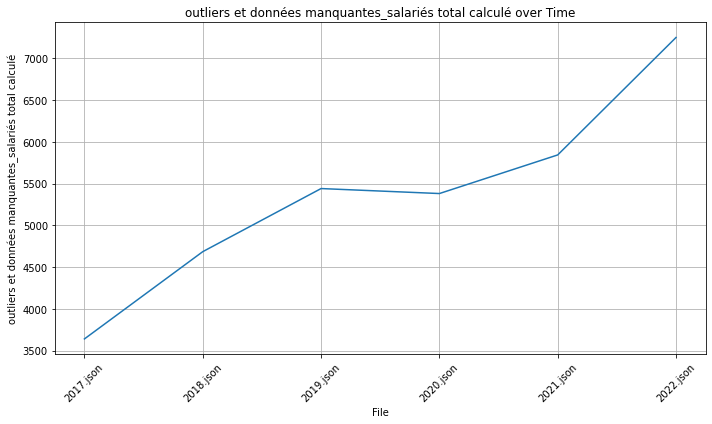

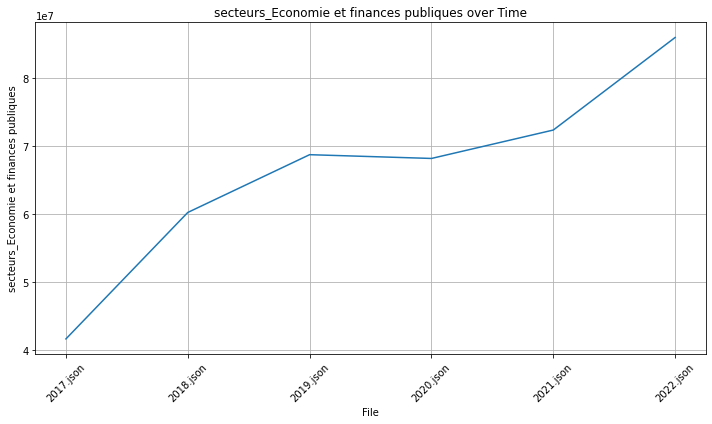

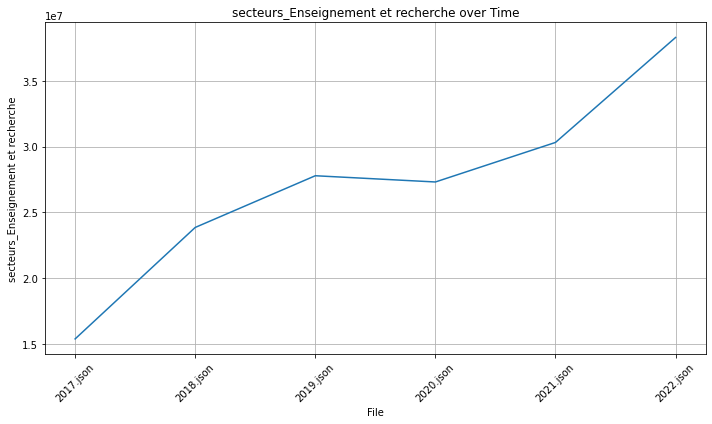

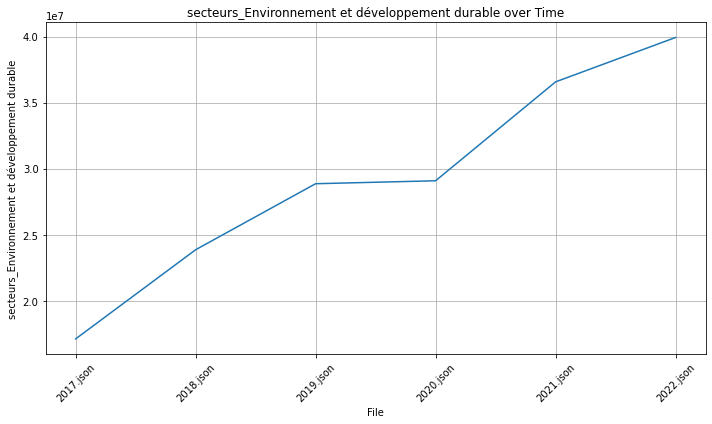

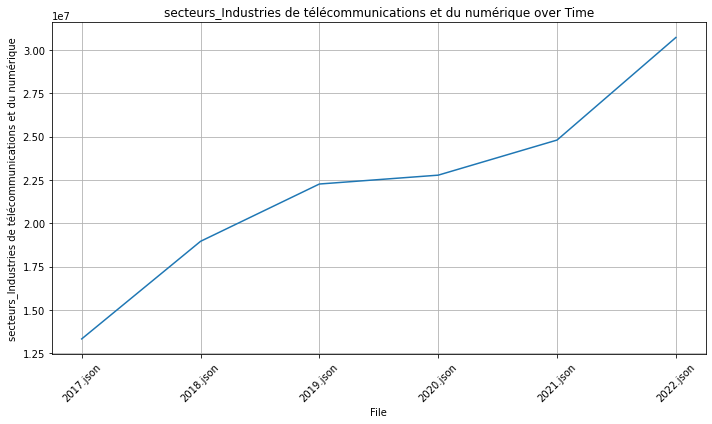

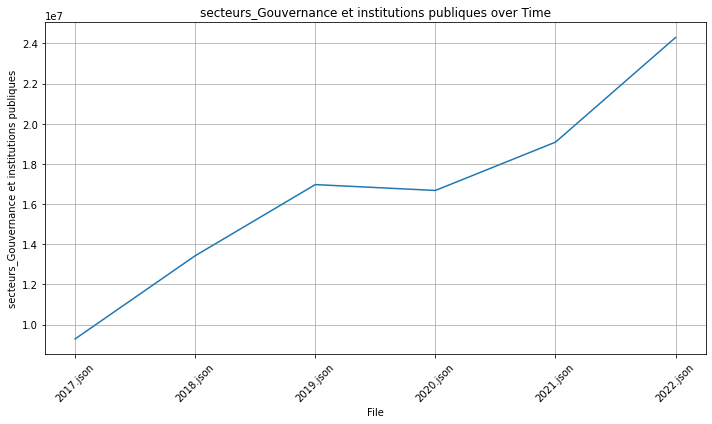

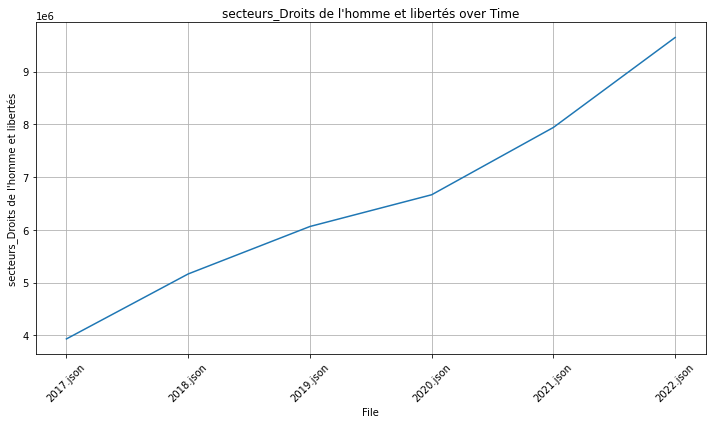

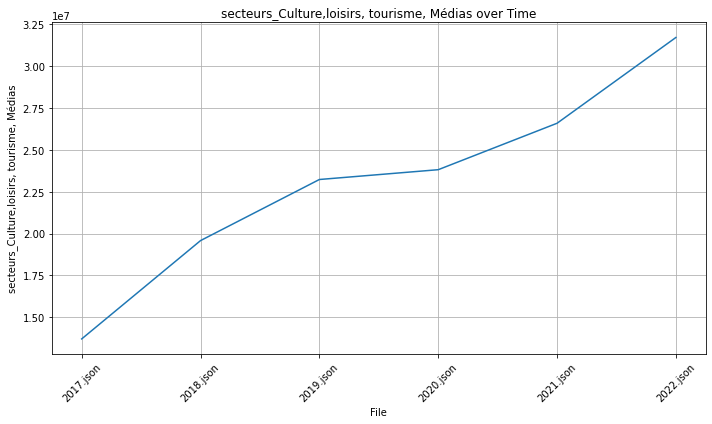

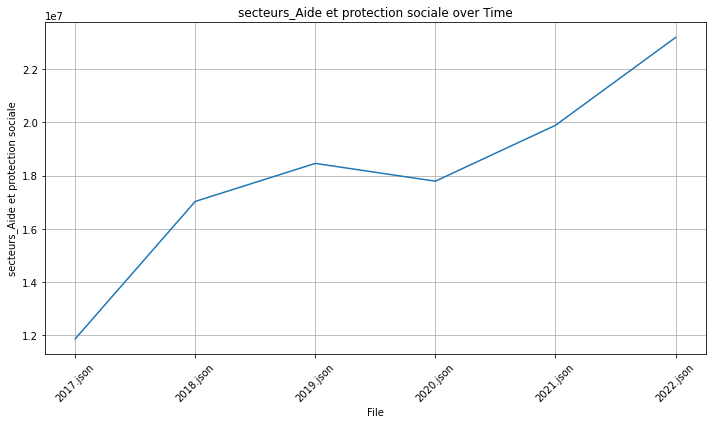

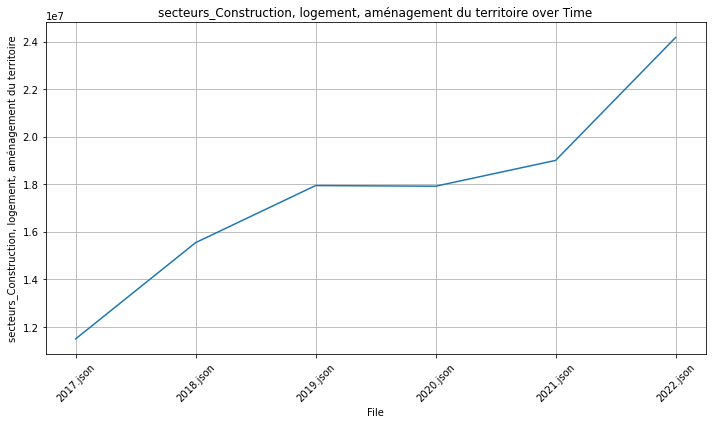

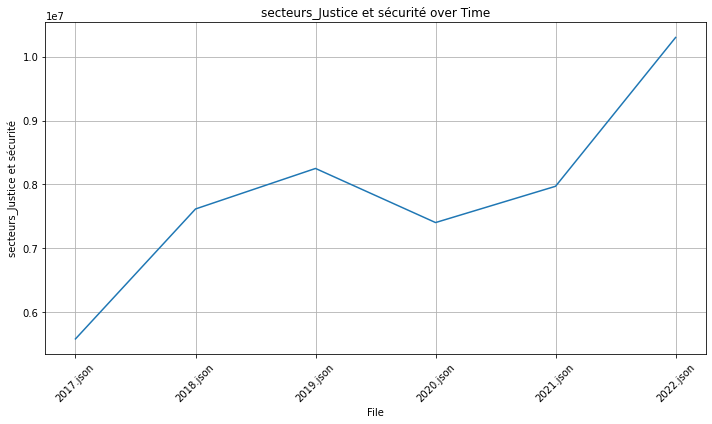

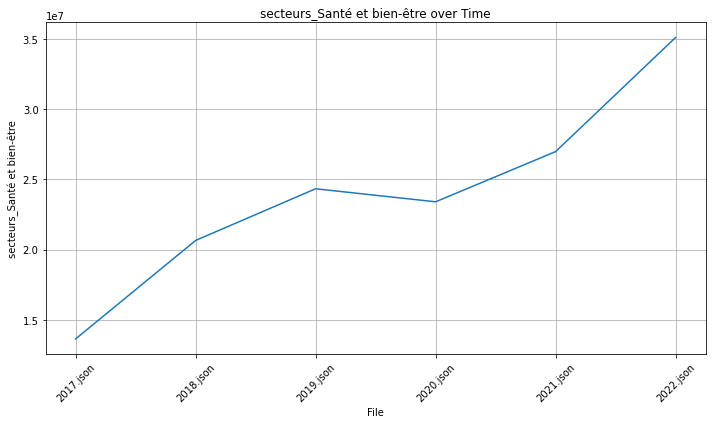

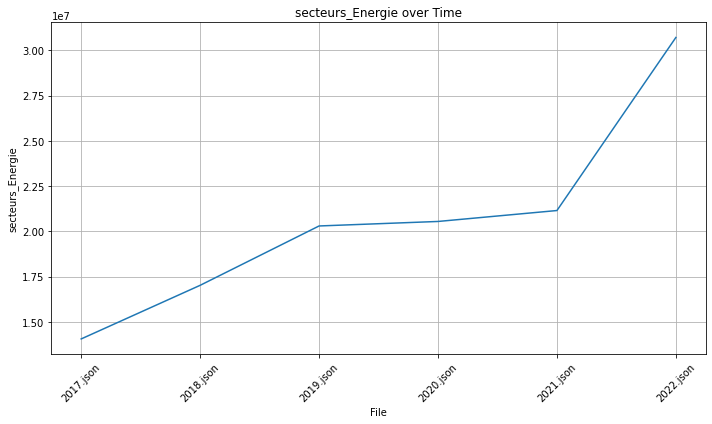

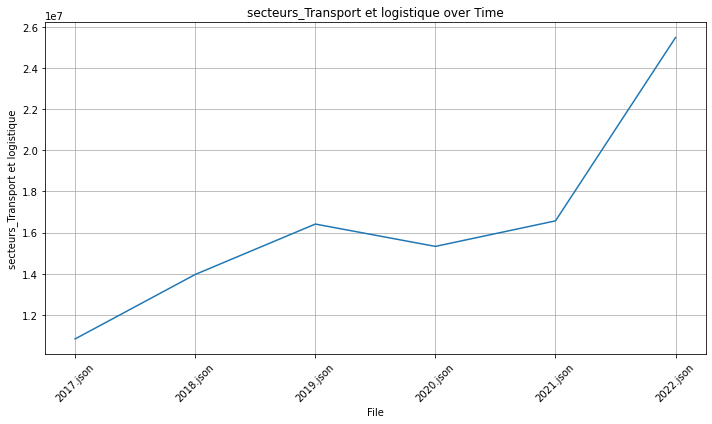

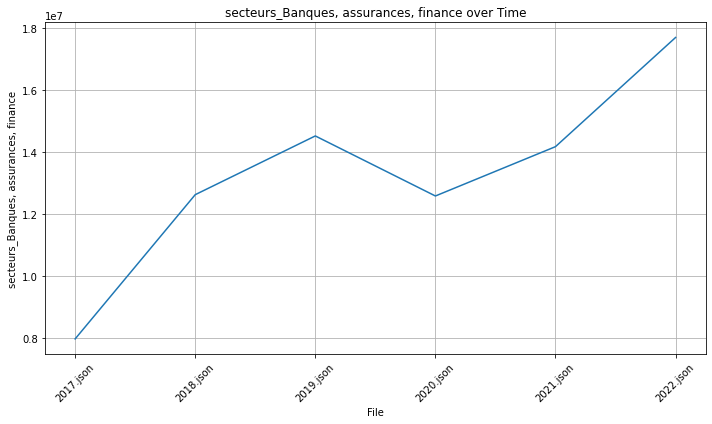

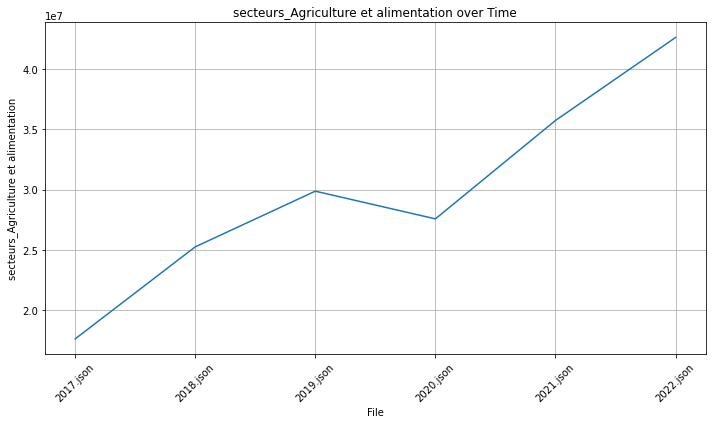

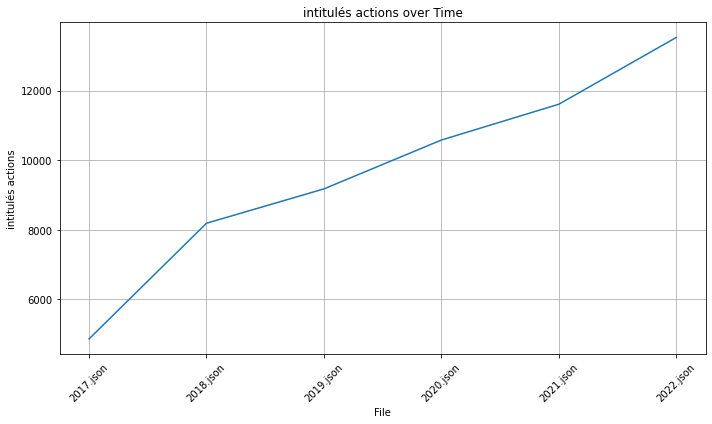

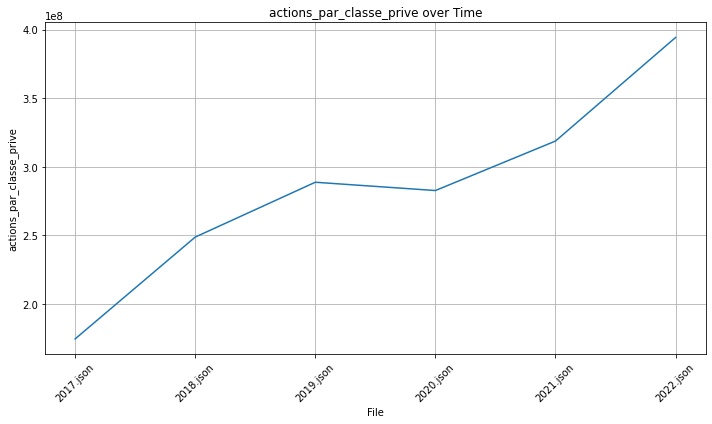

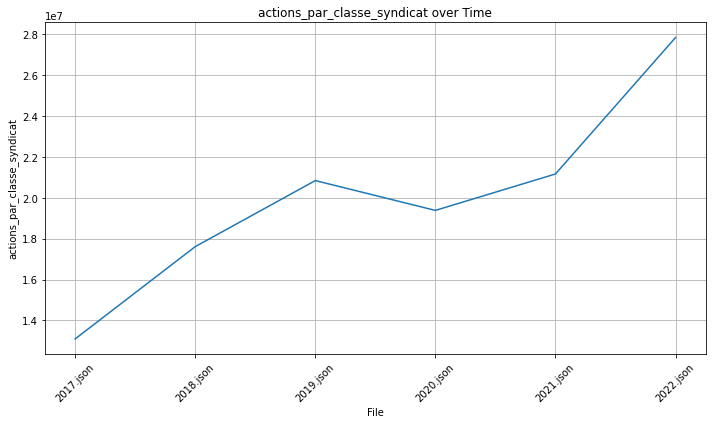

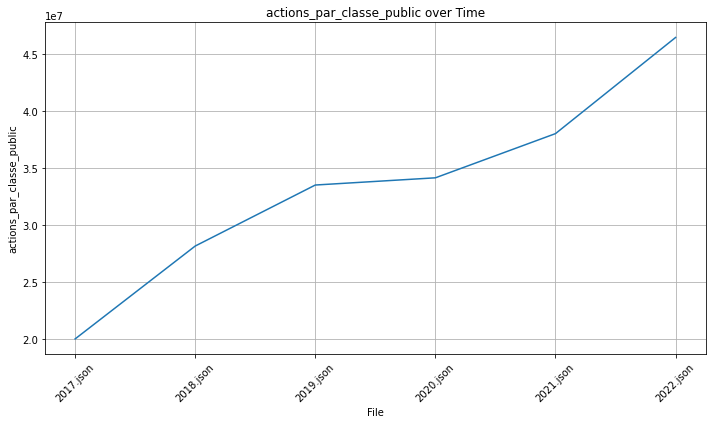

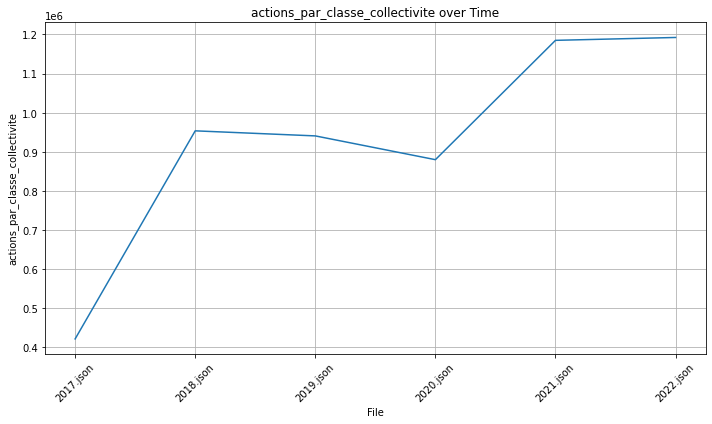

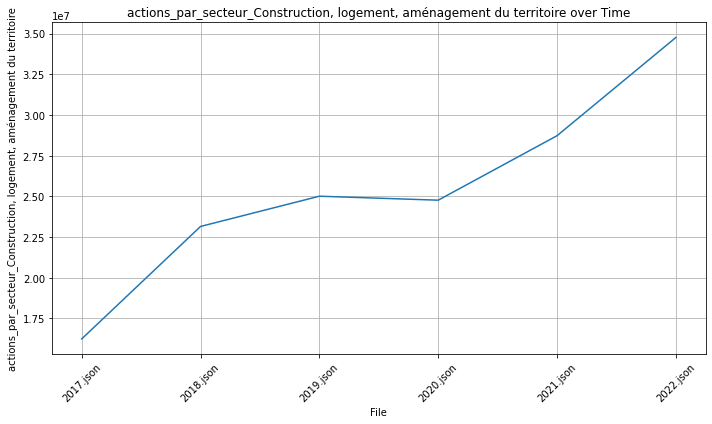

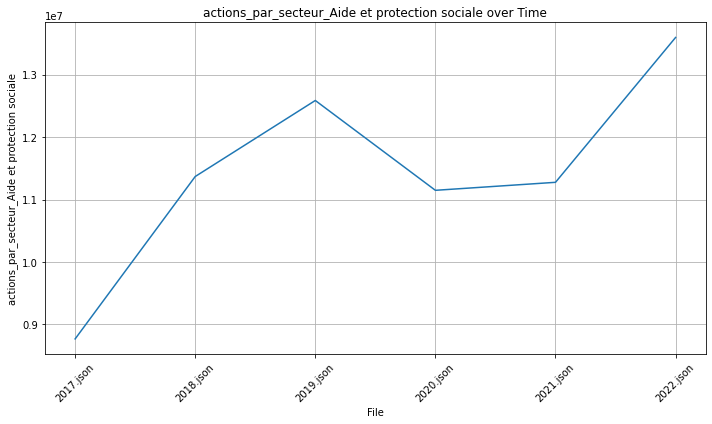

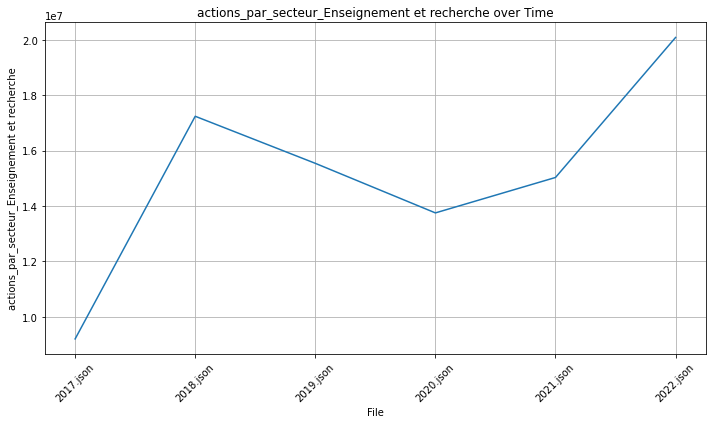

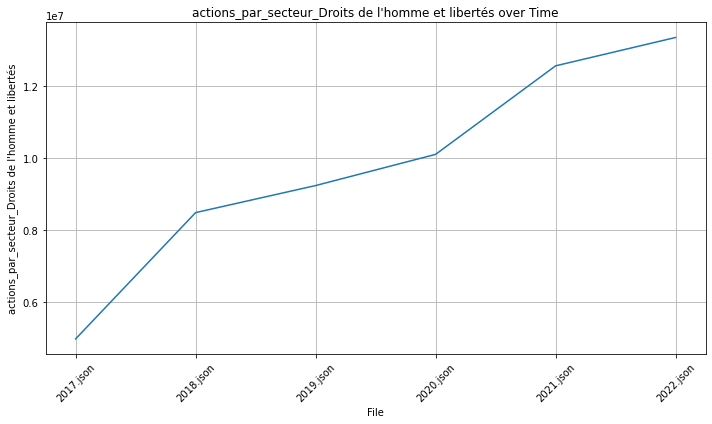

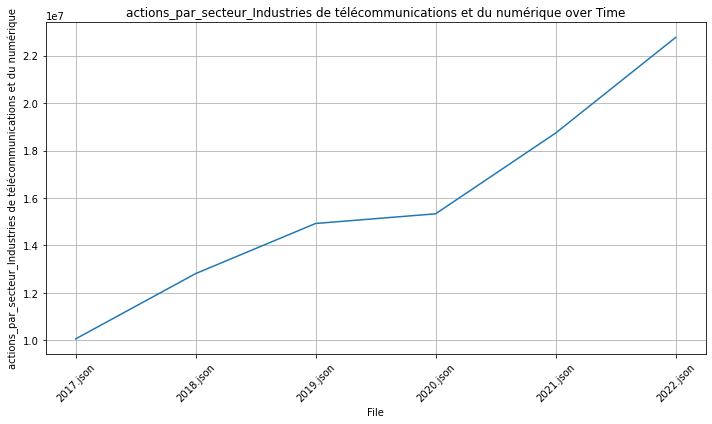

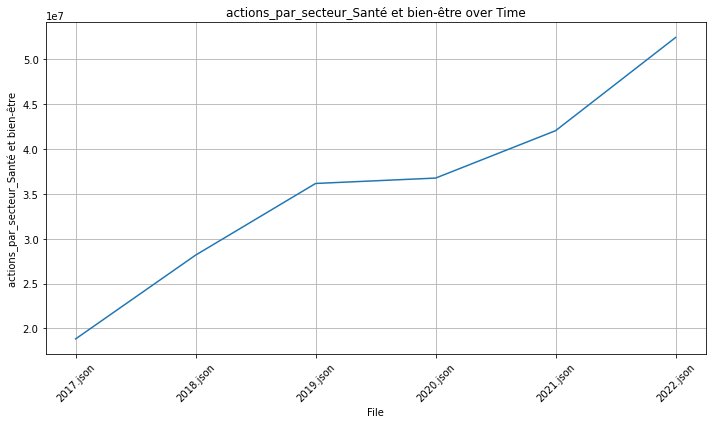

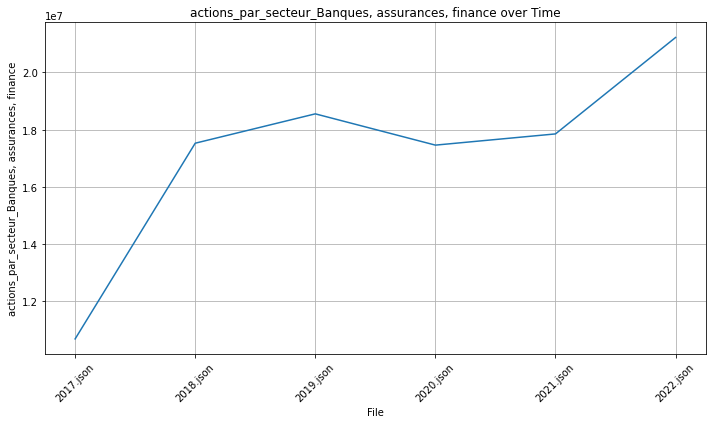

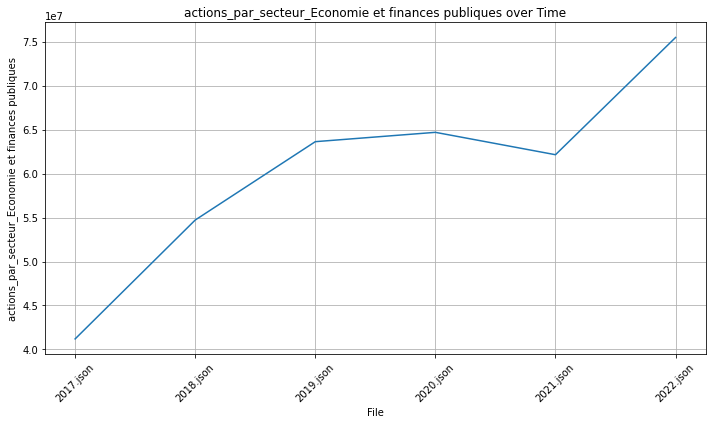

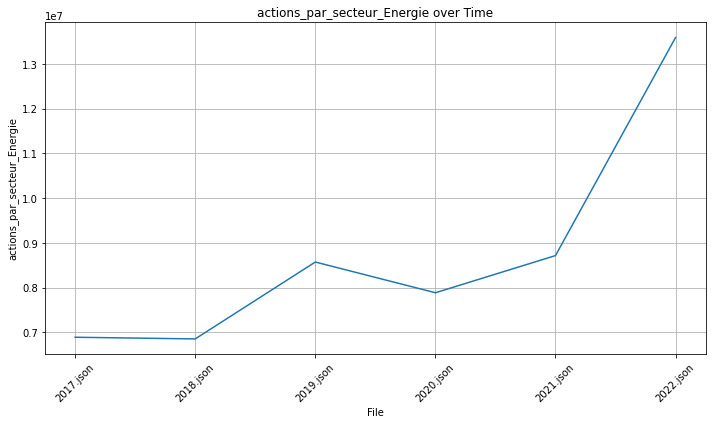

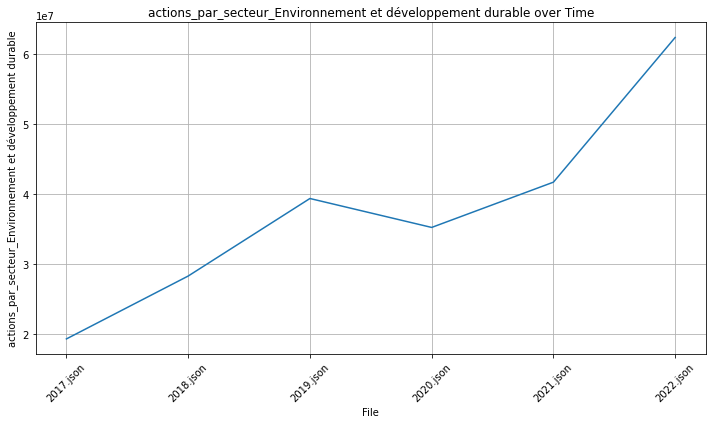

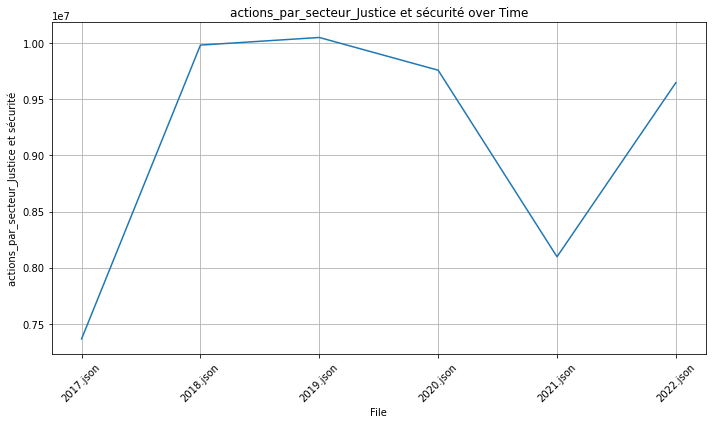

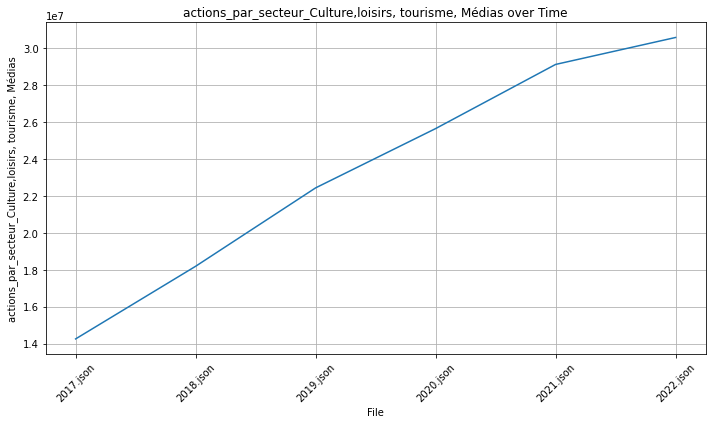

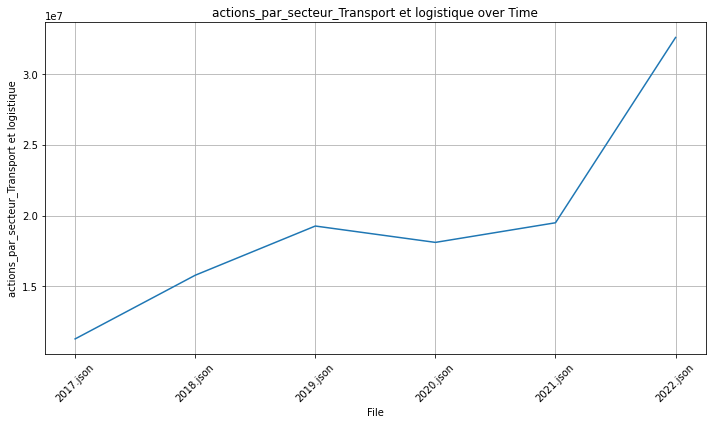

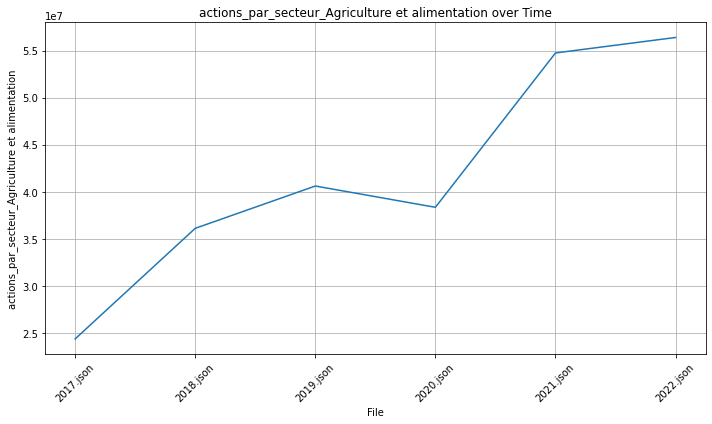

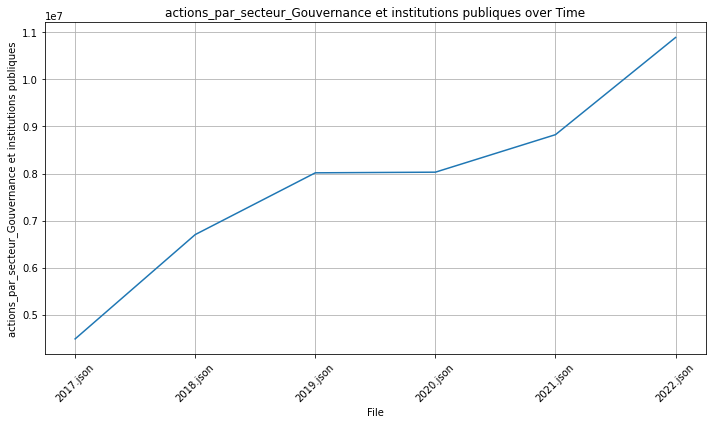

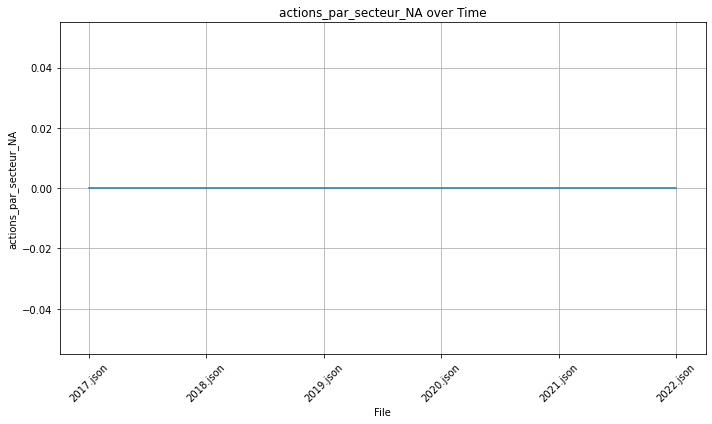

In [16]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

def process_json_files():
    # Get list of JSON files in the current directory
    files = [f for f in os.listdir() if f.endswith('.json')]
    
    # Create an empty list to store data
    data = []

    # Iterate over each JSON file
    for file in files:
        with open(file, 'r') as f:
            json_data = json.load(f)
            
            # Initialize a dictionary to store data for the current file
            file_data = {'File': file}
            
            # Iterate over each key in the JSON data
            for key, value in json_data.items():
                if isinstance(value, dict):
                    # If the value is a dictionary, iterate over its items
                    for sub_key, sub_value in value.items():
                        file_data[key + '_' + sub_key] = sub_value
                else:
                    # If it's not a dictionary, store it directly
                    file_data[key] = value
            
            # Append the data for the current file to the list
            data.append(file_data)
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    
    # Sort rows by 'File' column
    df.sort_values(by='File', inplace=True)
    
    return df

# Process JSON files
result_df = process_json_files()

# Convert relevant columns to numeric
numeric_columns = result_df.select_dtypes(include=['int', 'float']).columns
result_df[numeric_columns] = result_df[numeric_columns].apply(pd.to_numeric)

# Plot evolution of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(result_df['File'], result_df[col])
    plt.title(col + ' over Time')
    plt.xlabel('File')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    